## Processing sensor data from Shale Hills CZO TMMS site ##

Marc Berghouse 8/8/2020

This array includes:
- Apogee Instruments SO-110 O2 sensors
- Eosense EosGP CO2 sensors
- tipping bucket

Other data includes:
- PRISM daily precipitation



Current issues include:
- Determining what data should be dropped
- Adding barometric pressure 
 

In [1]:
import os
os.chdir('/Users/marcb/Desktop')
os.getcwd()

'C:\\Users\\marcb\\Desktop'

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt


# Define filenames
infile1 = "CO2 Data/raw_data/Shale Hills/TMMS/TMMS_CO2_O2.csv" 
infile2 = "CO2 Data/raw_data/Shale Hills/Precipitation/PRISM_GarnerRun.csv" 


# Read the .dat files as Pandas dataframes and load in the date/times
df1 = pd.read_csv(infile1,  na_values='NAN', parse_dates=[0], index_col=0) 
df2 = pd.read_csv(infile2, na_values='NAN', skiprows=10, parse_dates=[0], index_col=0) 
#The precipitation data is out of the date range for the CO2 data


[Text(0, 0.5, 'mm'), Text(0.5, 1.0, 'PRISM precipitation')]

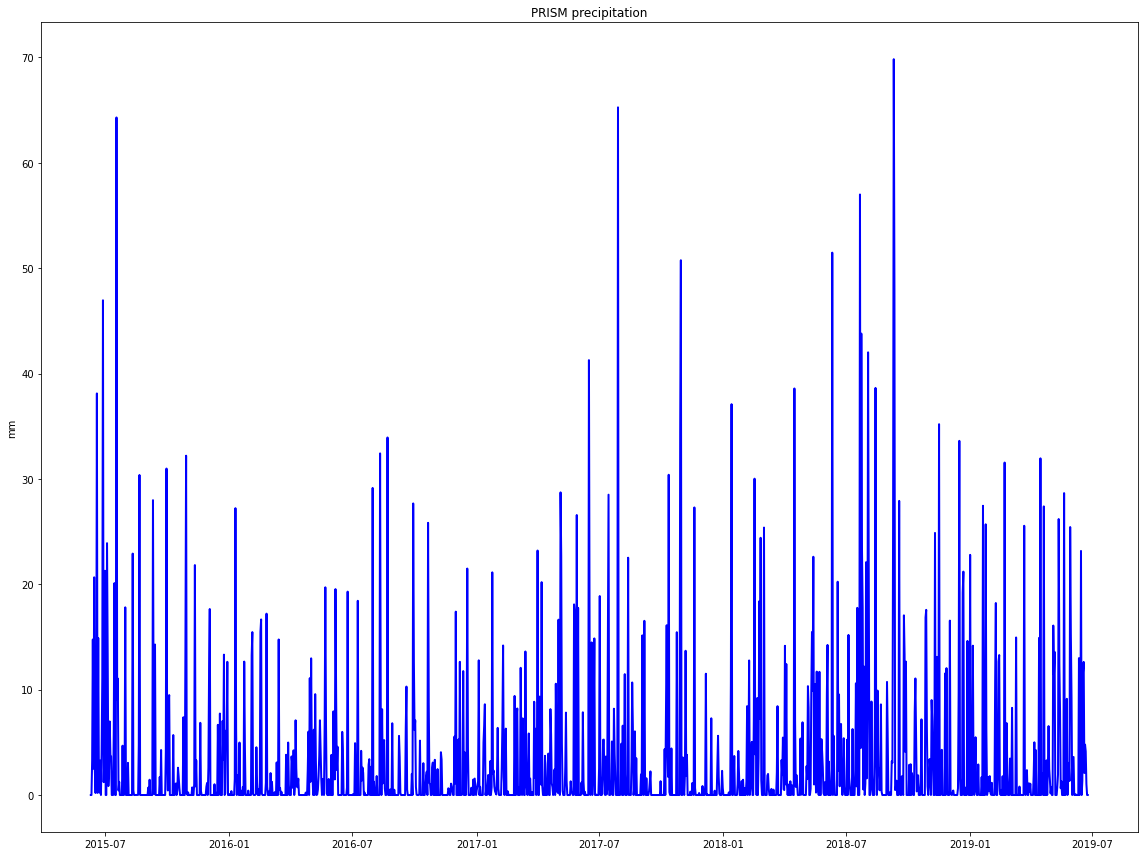

In [3]:
fig, (ax1) = plt.subplots(1, figsize=(16,12), sharex=True, tight_layout=True)
ax1.plot(df2.index, df2['ppt (mm)'], 'b', linewidth=2)
ax1.set(ylabel='mm', title='PRISM precipitation')

In [4]:
#merge dataframes and drop record columns
df1=df1.drop(columns="RECORD")
df=pd.concat([df1,df2], sort=False)

#df2=df2.drop(columns='Record')
#df = df1.join(df2, how='outer')
#pd.set_option("display.max_rows", 10)

df['ppt (mm)']

2015-06-10 14:00:00     NaN
2015-06-10 15:00:00     NaN
2015-06-10 16:00:00     NaN
2015-06-10 17:00:00     NaN
2015-06-10 18:00:00     NaN
                       ... 
2019-06-20 00:00:00    4.78
2019-06-21 00:00:00    4.14
2019-06-22 00:00:00    1.04
2019-06-23 00:00:00    0.00
2019-06-24 00:00:00    0.00
Name: ppt (mm), Length: 26638, dtype: float64

In [5]:
#Rename all columns with format "var_depth.unit" (SoilTemp_102cm.deg.C)

df.columns=["DiffVolt_30cm.mV", "DiffVolt_80cm.mV", "O2_30cm.percent.0-100", "O2_80cm.percent.0-100",  "ApogeeTemp_30cm.deg.C" , "ApogeeTemp_80cm.deg.C", "CO2lo_30cm.ppm","CO2hi_30cm.ppm", "GPTemp_30cm.deg.C", "CO2lo_80cm.ppm", "CO2hi_80cm.ppm", "GPTemp_80cm.deg.C", "PRISM_precip.mm"]
df

,DiffVolt_30cm.mV,DiffVolt_80cm.mV,O2_30cm.percent.0-100,O2_80cm.percent.0-100,ApogeeTemp_30cm.deg.C,ApogeeTemp_80cm.deg.C,CO2lo_30cm.ppm,CO2hi_30cm.ppm,GPTemp_30cm.deg.C,CO2lo_80cm.ppm,CO2hi_80cm.ppm,GPTemp_80cm.deg.C,PRISM_precip.mm
2015-06-10 14:00:00,48.380001,43.770000,20.110001,16.540001,14.09,12.57,5039.1899,5043.2441,20.32,2833.7839,38086.488,0.0,NaN
2015-06-10 15:00:00,48.340000,43.790001,20.090000,16.549999,14.17,12.58,5040.5420,5113.5142,20.68,2833.7839,37600.000,0.0,NaN
2015-06-10 16:00:00,48.270000,43.799999,20.059999,16.549999,14.23,12.58,5020.2710,4994.5952,20.34,2843.2429,37372.980,0.0,NaN
2015-06-10 17:00:00,48.270000,43.799999,20.059999,16.549999,14.30,12.57,4982.4331,5064.8652,20.75,2836.4871,36832.430,0.0,NaN
2015-06-10 18:00:00,48.200001,43.799999,20.040001,16.549999,14.38,12.57,5039.1899,5027.0269,20.49,2825.6760,36908.109,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.78
2019-06-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.14
2019-06-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.04
2019-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00


In [6]:
#masking values that seem erroneous

#df['DiffVolt_30cm.mV'].mask(df['DiffVolt_30cm.mV'].between(-1,30), inplace=True)
#df['DiffVolt_140cm.mV'].mask(df['DiffVolt_140cm.mV'].between(-1,30), inplace=True)
#df.iloc[:,6].mask(df.iloc[:,6].between(-30,1), inplace=True)
#df.iloc[:,7].mask(df.iloc[:,7].between(-30,1), inplace=True)
#df.iloc[:,7].mask(df.iloc[:,7].between(30,10000), inplace=True)
#df['GPTemp_30cm.deg.C'].mask(df['GPTemp_30cm.deg.C'].between(-30,0), inplace=True)
#df['GPTemp_140cm.deg.C'].mask(df['GPTemp_140cm.deg.C'].between(-30,0), inplace=True)
#df['SoilO2_30cm.percent.0-100'].mask(df['SoilO2_30cm.percent.0-100'].between(-3,0), inplace=True)
#df['SoilO2_140cm.percent.0-100'].mask(df['SoilO2_140cm.percent.0-100'].between(-3,0), inplace=True)
df.mask(df<=-0.01, inplace=True)
df.loc['2015-6-5':'2016-6-20']=np.nan

df

,DiffVolt_30cm.mV,DiffVolt_80cm.mV,O2_30cm.percent.0-100,O2_80cm.percent.0-100,ApogeeTemp_30cm.deg.C,ApogeeTemp_80cm.deg.C,CO2lo_30cm.ppm,CO2hi_30cm.ppm,GPTemp_30cm.deg.C,CO2lo_80cm.ppm,CO2hi_80cm.ppm,GPTemp_80cm.deg.C,PRISM_precip.mm
2015-06-10 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-10 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-10 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-10 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-10 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.78
2019-06-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.14
2019-06-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.04
2019-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00


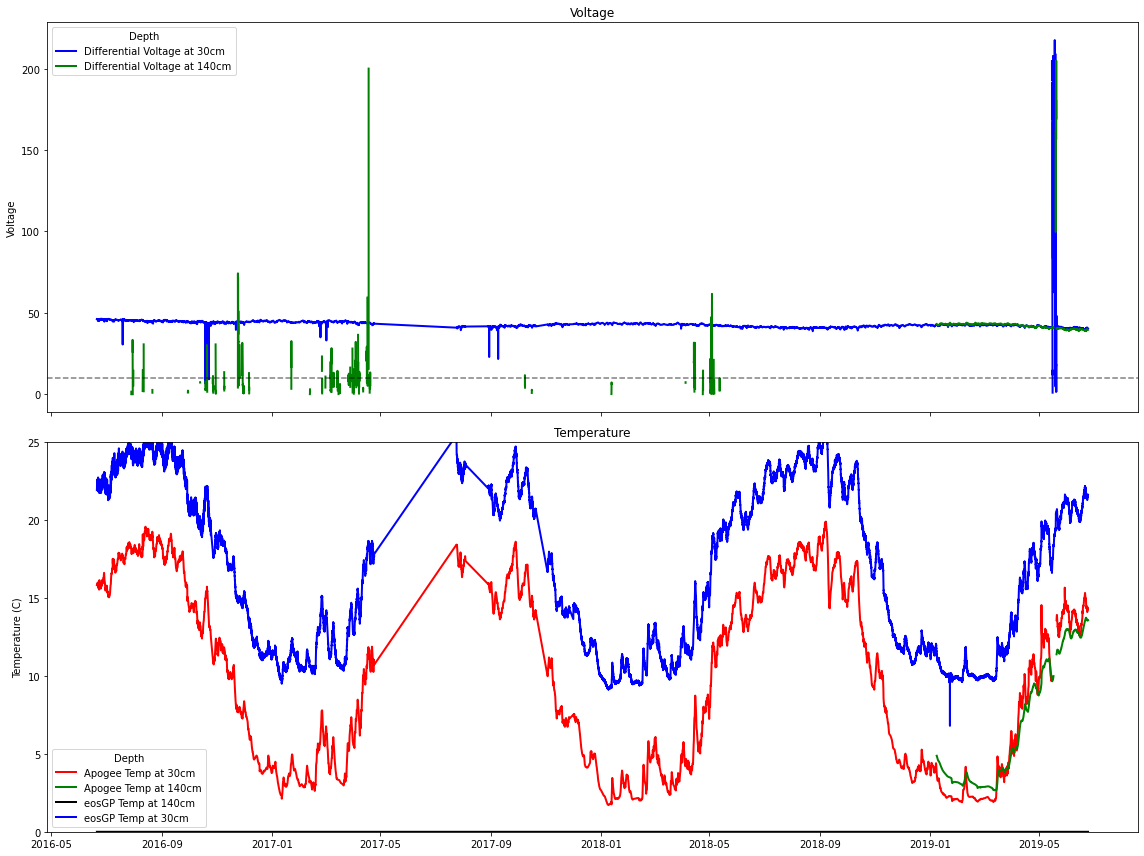

In [7]:
# Plot the datalogger parameters: battery voltage, panel temperature, enclosure temperature, and barometric pressure
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,12), tight_layout=True)

# Apogee SO-110 differntial voltages
ax1.plot(df.index, df['DiffVolt_30cm.mV'], 'b', linewidth=2, label='Differential Voltage at 30cm')
ax1.plot(df.index, df['DiffVolt_80cm.mV'], 'g', linewidth=2, label='Differential Voltage at 140cm')
ax1.set(ylabel='Voltage', title='Voltage')#, ylim=[36,48])
ax1.axhline(y=10, linestyle='--', color='k', alpha=0.5)
ax1.legend(title='Depth', loc='best')

# datalogger temperatures
#  - for some reason I can't use df['ApogeeTemp_30cm.deg.C'] and have to instead use df.iloc[:,6]
#  - The data for Apogee Temp at 140cm seems to be all messed up
ax2.plot(df.index, df["ApogeeTemp_30cm.deg.C"], 'r', linewidth=2, label='Apogee Temp at 30cm')
ax2.plot(df.index, df["ApogeeTemp_80cm.deg.C"], 'g', linewidth=2, label='Apogee Temp at 140cm')
ax2.plot(df.index, df['GPTemp_80cm.deg.C'], 'k', linewidth=2, label='eosGP Temp at 140cm')
ax2.plot(df.index, df['GPTemp_30cm.deg.C'], 'b', linewidth=2, label='eosGP Temp at 30cm')
ax2.set(ylabel='Temperature (C)', title='Temperature', ylim=[0,25])
ax2.legend(title='Depth', loc='best')


In [8]:
#Correct Apogee SO-110 O2 data
# - Apogee data has already been calibrated, although it is in percent saturation. Should we switch to ppm, or is this fine? 
#cal_fac = 0.379
#offset = 1.14
#df['SoilO2_30cm.kPa'] = cal_fac*df['SoilO2_30cm.percent.0-100'] - offset # Convert from mV to kPa
#df['SoilO2_140cm.kPa'] = cal_fac*df['SoilO2_140cm.percent.0-100'] - offset

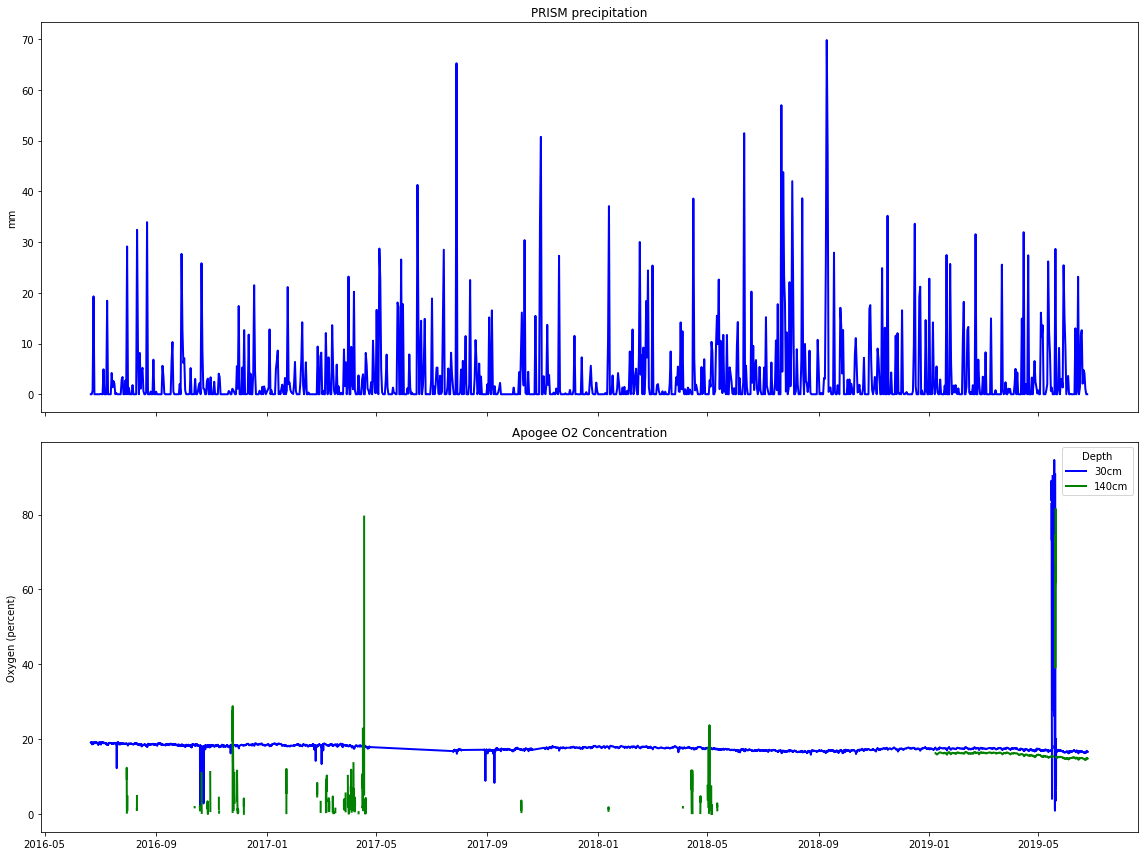

In [9]:
#Plot O2 and precipitation data

fig, (ax1, ax2) = plt.subplots(2, figsize=(16,12), sharex=True, tight_layout=True)
ax1.plot(df.index, df['PRISM_precip.mm'], 'b', linewidth=2)
ax1.set(ylabel='mm', title='PRISM precipitation')

ax2.plot(df.index, df['O2_30cm.percent.0-100'], 'b', linewidth=2, label='30cm')
ax2.set(ylabel='Oxygen (percent)', title='Apogee O2 Concentration')
ax2.plot(df.index, df['O2_80cm.percent.0-100'], 'g', linewidth=2, label='140cm')
ax2.legend(title='Depth', loc='best')

#df['Apogee_CorrO2_Avg'] = df['SoilO2_30cm.kPa']/df['BarometricPress_Avg']*100
#ax3.plot(df.index, df['Apogee_CorrO2_Avg'], 'k', linewidth=2)
#ax3.set(ylabel='Oxygen (%)', title='Apogee O2 Concentration');

No handles with labels found to put in legend.


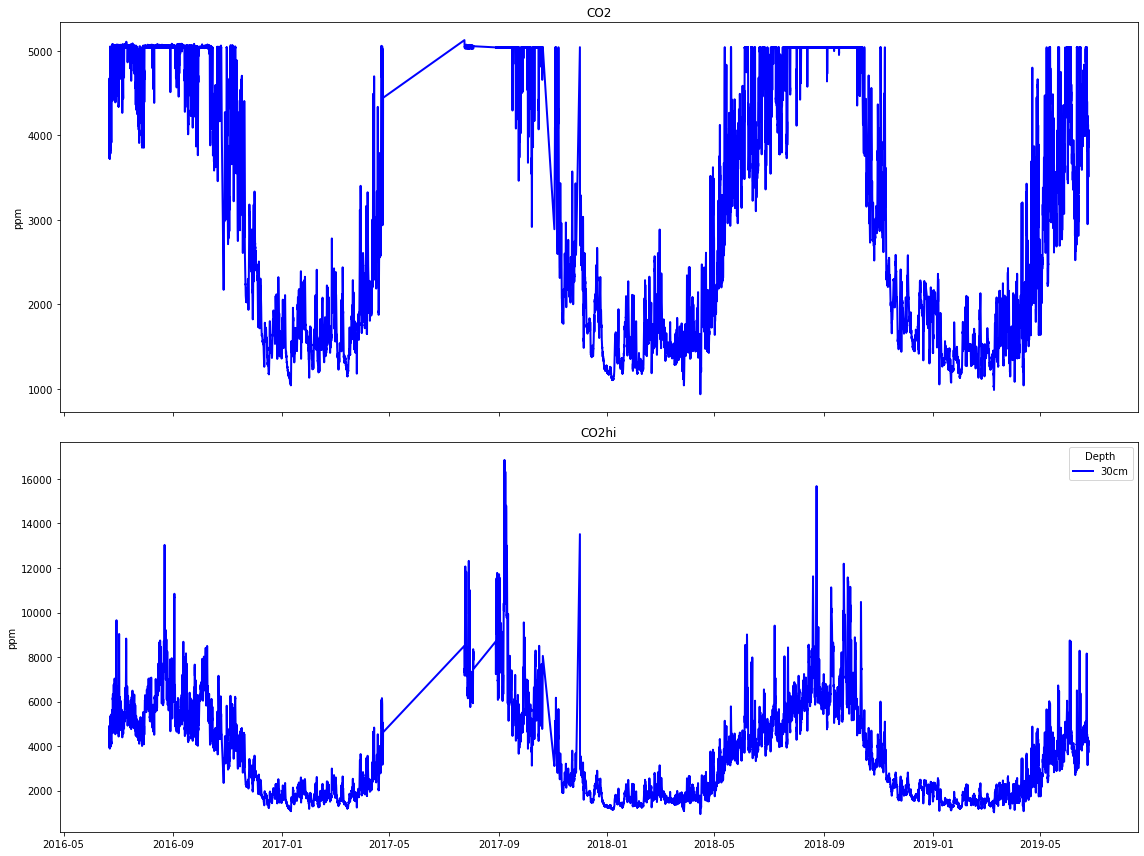

In [10]:
#Plot CO2 data 



#df['CO2hi_140cm.ppm'].loc['2/24/2018  6:00:00 PM':'10/2/2018  2:00:00 PM']=np.nan
fig, (ax1, ax2) = plt.subplots(2, figsize=(16,12), sharex=True, tight_layout=True)
ax1.plot(df.index, df['CO2lo_30cm.ppm'], 'b', linewidth=2, label='lo_30cm')
#ax1.plot(df.index, df['CO2hi_80cm.ppm'], 'g', linewidth=2, label='hi_140cm')
#ax1.plot(df.index, df['CO2lo_140cm.ppm'], 'g', linewidth=2, label='140cm')
ax1.set(ylabel='ppm', title='CO2')
ax2.legend(title='Depth', loc='best')
ax2.plot(df.index, df['CO2hi_30cm.ppm'], 'b', linewidth=2, label='30cm')
#ax2.plot(df.index, df['CO2hi_80cm.ppm'], 'g', linewidth=2, label='140cm')
ax2.set(ylabel='ppm', title='CO2hi')
ax2.legend(title='Depth', loc='best')

In [11]:
output=df.copy()
today = dt.date.today()
outfile = 'CO2 Data/processed_data/Shale Hills/TMMS_processed.csv'
output.to_csv(outfile, na_rep=-99999, index_label='DateTime.MST')

In [12]:
output

,DiffVolt_30cm.mV,DiffVolt_80cm.mV,O2_30cm.percent.0-100,O2_80cm.percent.0-100,ApogeeTemp_30cm.deg.C,ApogeeTemp_80cm.deg.C,CO2lo_30cm.ppm,CO2hi_30cm.ppm,GPTemp_30cm.deg.C,CO2lo_80cm.ppm,CO2hi_80cm.ppm,GPTemp_80cm.deg.C,PRISM_precip.mm
2015-06-10 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-10 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-10 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-10 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-10 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.78
2019-06-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.14
2019-06-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.04
2019-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
